___

<h1>ENSEMBLE & RANDOM FOREST</h1>




However an aggregated answer is better than an experts answer. This is called Random Forest also known as the wisdom of the crowd. We can think of machine learning models as people where a group of predictors are called
is called an "Ensemble".

There are two methods to this. The first one is using a collection of very diffrent models training on the same data. In this method, each of the classifiers has equal say, known as voting classification. This method often achieaves better performance than the best classifer in the ensemble even when each classifier is a weak learner.

The second method is called bagging(bootstapping) and pasting. This method uses the same training algorithim for every predictor while also training each one on a different random subsets of the training data.

___

In [74]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import make_moons

from sklearn.datasets import make_hastie_10_2

In [75]:
X,y = make_moons(n_samples=600, noise=0.30,random_state=45)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [78]:
train_colors = ["blue" if label == 1 else "red" for label in y_train]
test_colors = ["blue" if label == 1 else "red" for label in y_test]

No handles with labels found to put in legend.


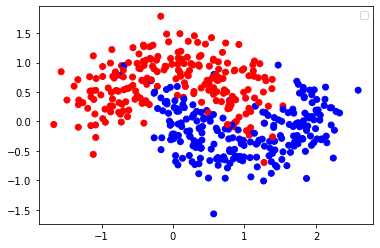

In [79]:
plt.scatter(x_train[:,0],x_train[:,1], c = train_colors)
plt.legend()

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron

In [81]:
from sklearn.ensemble import VotingClassifier

In [82]:
clf = VotingClassifier([("log_reg",LogisticRegression()),
                       ("tree", DecisionTreeClassifier(max_depth= 2)),
                       ("perceptron",Perceptron())],voting="hard")
learners = [LogisticRegression(),
           DecisionTreeClassifier(max_depth=2),
           Perceptron(),
           clf]

from sklearn.metrics import accuracy_score

for learner in learners:
    learner.fit(x_train, y_train)
    y_pred = learner.predict(x_test)
    print(f"{learner.__class__.__name__},accuracy= {accuracy_score(y_test,y_pred)}")

LogisticRegression,accuracy= 0.8333333333333334
DecisionTreeClassifier,accuracy= 0.8666666666666667
Perceptron,accuracy= 0.8333333333333334
VotingClassifier,accuracy= 0.86


___

**As we can see Forest Trees compare diffrent algorithms and test which one is faster.** 

**Another method we could use is use the same algorithm for each predictor for every predictor and train each one on a different. Below we find the random subset of the training data.*

___

No handles with labels found to put in legend.
No handles with labels found to put in legend.


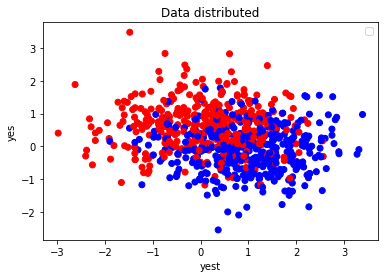

In [83]:
X,y = make_moons(n_samples=1000, noise=0.65,random_state=1 )
colors = ["blue " if label == 1 else "red" for label in y]
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y)


train_colors = ["blue" if label == 1 else "red" for label in y_train]
test_colors = ["blue" if label == 1 else "red" for label in y_test]

plt.scatter(x_train[:,0],x_train[:,1], c = train_colors)
plt.legend()
plt.xlabel('yest')
plt.ylabel('yes')
plt.title('Data distributed')
plt.legend()

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron



In [84]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier


#n_estimators = n_samples
#too 
rf_clf = RandomForestClassifier(n_estimators=750, max_leaf_nodes=6)

rf_clf.fit(x_train, y_train)
accuracy_score(y_test, rf_clf.predict(x_test))

0.736

**We then take a subset a group of the models and aggregate them. For reference, we set n_jobs equal to -1 to the model to do parallel computing.**

from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=750,
                           bootstrap=True, n_jobs= -1)

bag_clf.fit(x_train, y_train)
accuracy_score(y_test, bag_clf.predict(x_test))

__**As we can see the random forest method did just as good as the the first method. But what would happen if we increased our depth? Would it perform better than our bootstrap method?**__


In [85]:
clf = VotingClassifier([("log_reg",LogisticRegression()),
                       ("tree", DecisionTreeClassifier(max_depth= 4)),
                       ("perceptron",Perceptron())],voting="hard")
learners = [LogisticRegression(),
           DecisionTreeClassifier(max_depth=2),
           Perceptron(),
           clf]

from sklearn.metrics import accuracy_score

for learner in learners:
    learner.fit(x_train, y_train)
    y_pred = learner.predict(x_test)
    print(f"{learner.__class__.__name__},accuracy= {accuracy_score(y_test,y_pred)}")

LogisticRegression,accuracy= 0.764
DecisionTreeClassifier,accuracy= 0.728
Perceptron,accuracy= 0.632
VotingClassifier,accuracy= 0.74


**Changing the max_depth to 5 did not really seem to do much of an affect on the accurary of the model. 
I think it is safe to condlude that perhaps the model**

Lets try using a diffrent data set. Lets use california housing prices. This time will use a Random Forest Regressor to predict california housing prices.

In [86]:
from sklearn.datasets import fetch_california_housing

In [87]:
california_housing = fetch_california_housing()

In [88]:
X,y = california_housing['data'],california_housing['target']

In [89]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [90]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 2000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=2000, random_state=42)

In [91]:
y_pred = regressor.predict(X_test)

In [92]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,1.369,1.413991
1,2.413,2.527702
2,2.007,1.424310
3,0.725,0.853909
4,4.600,4.495631
...,...,...
6187,0.740,1.152105
6188,1.773,1.872585
6189,3.519,4.565310
6190,0.925,0.736870


In [93]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Squared Error: 0.2715821571826105
R2 Score: 0.7962986335986513


Our mean squared error is ___ and our 

/Users/geovaniiramirez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/geovaniiramirez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


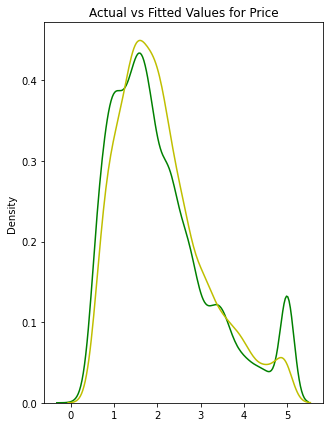

In [94]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="g", label="Actual Value")
sns.distplot(y_pred, hist=False, color="y", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

As we can see there is definetly room for improvement.